<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week5/digits_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1) 데이터 불러오기
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [13]:
# 2) 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 3) One-hot 인코딩
y_categorical = to_categorical(y, num_classes=10)

In [15]:
# 4) 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42
)

In [16]:
# 5) DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(64,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 숫자 0~9 → 10개 클래스

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 6) 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# 7) 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3815 - loss: 2.0152 - val_accuracy: 0.8259 - val_loss: 0.9936
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8781 - loss: 0.6765 - val_accuracy: 0.9370 - val_loss: 0.2822
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9729 - loss: 0.1839 - val_accuracy: 0.9611 - val_loss: 0.1623
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9821 - loss: 0.0998 - val_accuracy: 0.9685 - val_loss: 0.1261
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9900 - loss: 0.0565 - val_accuracy: 0.9704 - val_loss: 0.1075
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9978 - loss: 0.0343 - val_accuracy: 0.9704 - val_loss: 0.1039
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9980 - loss: 0.0259 - val_accuracy: 0.9741 - val_loss: 0.0882
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.9741 - val_lo

In [19]:
# 8) 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 정확도: {acc:.4f}")

DL 모델 테스트 정확도: 0.9852


In [20]:
# 9) 예측
y_pred = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [21]:
# 10) MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(f"DL 모델 테스트 MSE: {mse:.6f}")

DL 모델 테스트 MSE: 0.002664


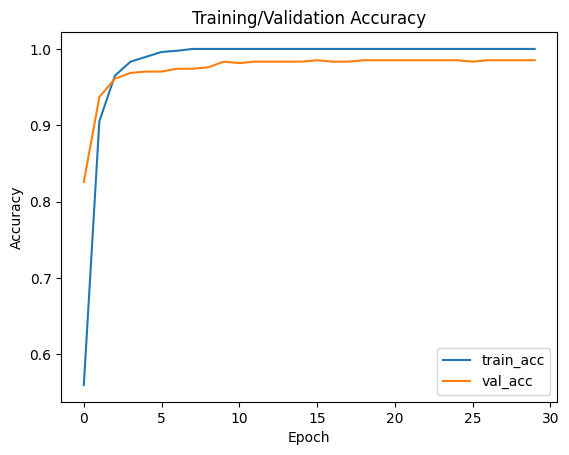

In [22]:
# 11) 학습 곡선 시각화
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training/Validation Accuracy")
plt.show()